In [1]:
!pip install simpletransformers


     |████████████████████████████████| 194kB 33.1MB/s 
     |████████████████████████████████| 204kB 43.4MB/s 
     |████████████████████████████████| 3.8MB 55.4MB/s 
     |████████████████████████████████| 645kB 46.2MB/s 
     |████████████████████████████████| 1.1MB 51.4MB/s 
     |████████████████████████████████| 890kB 54.1MB/s 
  Created wheel for seqeval: filename=seqeval-0.0.12-cp36-none-any.whl size=7424 sha256=1531fe60029a6c23b0c576d03ddbdff8d9c76d56c85df5d029a01743db1ed7cf
  Stored in directory: /root/.cache/pip/wheels/4f/32/0a/df3b340a82583566975377d65e724895b3fad101a3fb729f68
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=d230effcb875888a1e61613784e211a33508309fd6056a8927e56e7f0f86e550
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built seqeval sacremoses


In [0]:
#from tokenizers import AddedToken as AddedTokenFast

In [3]:

from simpletransformers.classification import ClassificationModel


# Create a TransformerModel
#model = ClassificationModel('bert_model', 'bert-base-cased', num_labels=3, args={'reprocess_input_data': True, 'overwrite_output_dir': True},use_cuda=True)
model = ClassificationModel('bert', 'bert-base-cased', num_labels=3, args={'reprocess_input_data': True, 'overwrite_output_dir': True},use_cuda = False)

In [0]:
## path
file_path = '/content/drive/My Drive/Colab Notebooks/sentiment-analysis-for-financial-news/all-data.csv'

In [0]:
## from tutorial from Kaggle financial news dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

df = pd.read_csv(file_path,encoding='latin-1')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
df

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...


In [0]:
df = df.rename(columns={'neutral':'sentiment','According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'statement'})

In [9]:
df.describe()

,sentiment,statement
count,4845,4845
unique,3,4837
top,neutral,SSH Communications Security Corporation is hea...
freq,2878,2


In [10]:
df.drop_duplicates(subset=['statement'],keep='first',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4837 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4837 non-null   object
 1   statement  4837 non-null   object
dtypes: object(2)
memory usage: 113.4+ KB


In [11]:
df.describe()

,sentiment,statement
count,4837,4837
unique,3,4837
top,neutral,"The size of the extension , 18.5 % of which al..."
freq,2871,1


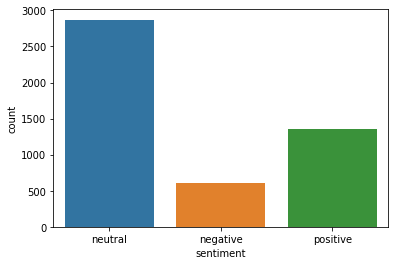

In [12]:
sns.countplot(df.sentiment)

In [13]:
df['sentiment'].value_counts()

neutral     2871
positive    1362
negative     604
Name: sentiment, dtype: int64

Address imbalanced data by undersampling

In [0]:
neg_rows = df[df['sentiment'] == 'negative']
neg_rows.head()

,sentiment,statement
1,negative,The international electronic industry company ...
414,negative,A tinyurl link takes users to a scamming site ...
420,negative,"Compared with the FTSE 100 index , which rose ..."
422,negative,"Compared with the FTSE 100 index , which rose ..."
499,negative,One of the challenges in the oil production in...


In [0]:
neutral_rows = df[df['sentiment'] == 'neutral']
neutral_rows.sample(frac=1,random_state=42)
neutral_rows = neutral_rows[:604]
#neutral_rows.head()

In [0]:
positive_rows = df[df['sentiment'] == 'positive']
positive_rows.sample(frac=1,random_state=42)
positive_rows = positive_rows[:604]
#neutral_rows.head()

In [0]:
balanced_df = pd.concat([positive_rows,neutral_rows,neg_rows])
#balanced_df.sample(frac=1, random_state =42)

,sentiment,statement
4599,negative,UPM said the move will lower net profit by x2...
502,neutral,Sanoma will continue to focus on investing in ...
4820,negative,"Operating margin , however , slipped to 14.4 %..."
4640,negative,"ADPnews - Aug 3 , 2009 - Finnish media group I..."
1167,neutral,"Also , Technopolis plans to build a 100 millio..."
...,...,...
1420,neutral,The service developed by Digia facilitates the...
2811,negative,"As a result of the negotiations , the company ..."
1092,neutral,The guidance has been set at 90 basis points o...
4296,negative,`` There 's the issue of thieves stealing them...


In [0]:
train,eva = train_test_split(balanced_df,test_size = 0.2,stratify=balanced_df['sentiment']) 
# stratify to make sure train and test splits have same label distribution
train['sentiment'].value_counts()

negative    483
neutral     483
positive    483
Name: sentiment, dtype: int64

By oversampling

In [14]:
!pip install imbalanced-learn


# check version number
import imblearn
print(imblearn.__version__)

0.4.3


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
from imblearn.over_sampling import SMOTE

# # transform the dataset
# oversample = SMOTE()
# # X, y = oversample.fit_resample(X, y)
# oversample_df = df
# oversample_df['statement'], oversample_df['sentiment'] = oversample.fit_resample(df['statement'], df['sentiment'])

In [17]:
df_filtered = df[df['sentiment']!= 'neutral']
df_filtered.head()

df_filtered['sentiment'] = df_filtered['sentiment'].apply(lambda x: 0 if x == 'positive' else 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [18]:
df_filtered.head()

,sentiment,statement
1,1,The international electronic industry company ...
2,0,With the new production plant the company woul...
3,0,According to the company 's updated strategy f...
4,0,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
5,0,"For the last quarter of 2010 , Componenta 's n..."


In [19]:
df_filtered.sentiment.value_counts()

0    1362
1     604
Name: sentiment, dtype: int64

In [20]:
oversample_df = df_filtered
oversample_df[['statement']]
#oversample_df['sentiment']

,statement
1,The international electronic industry company ...
2,With the new production plant the company woul...
3,According to the company 's updated strategy f...
4,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
5,"For the last quarter of 2010 , Componenta 's n..."
...,...
4839,HELSINKI Thomson Financial - Shares in Cargote...
4840,LONDON MarketWatch -- Share prices ended lower...
4842,Operating profit fell to EUR 35.4 mn from EUR ...
4843,Net sales of the Paper segment decreased to EU...


In [0]:
from imblearn.over_sampling import SMOTENC, RandomOverSampler

# transform the dataset

# smote_nc = SMOTENC(categorical_features=[0],random_state=0)
# # X, y = oversample.fit_resample(X, y)
# oversample_df = df_filtered
# oversample_df[['statement']], oversample_df['sentiment'] = smote_nc.fit_resample(oversample_df[['statement']], oversample_df['sentiment'])

In [0]:
# oversampler= RandomOverSampler()
# oversample_df = df_filtered
# oversample_df[['statement']], oversample_df['sentiment'] = oversampler.fit_resample(oversample_df[['statement']], oversample_df['sentiment'])

In [25]:
neutral_rows = df[df['sentiment'] == 'neutral']
len(neutral_rows)

2871

In [26]:
# make the other two minority classes to have same size with majority class "neutral"

negative_rows = df[df['sentiment'] == 'negative']
print(len(negative_rows))
negative_rows_resampled = negative_rows.sample(frac=len(neutral_rows)/len(negative_rows),random_state=42,replace=True)

positive_rows = df[df['sentiment'] == 'positive']
print(len(positive_rows))
positive_rows_resampled = positive_rows.sample(frac=len(neutral_rows)/len(positive_rows),random_state=42,replace=True)

604
1362


In [27]:
len(positive_rows_resampled)

2871

In [0]:
balanced_df_oversampled = pd.concat([positive_rows_resampled,neutral_rows,negative_rows_resampled])

In [29]:
len(balanced_df_oversampled)

8613

In [30]:
train,eva = train_test_split(balanced_df_oversampled,test_size = 0.2,stratify=balanced_df_oversampled['sentiment']) 
# stratify to make sure train and test splits have same label distribution
train['sentiment'].value_counts()

negative    2297
neutral     2297
positive    2296
Name: sentiment, dtype: int64

In [0]:
##reference: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

# The imbalanced-learn library supports random undersampling via the RandomUnderSampler class.

# We can update the example to first oversample the minority class to have 10 percent the number of examples of the majority class (e.g. about 1,000), then use random undersampling to reduce the number of examples in the majority class to have 50 percent more than the minority class (e.g. about 2,000).

# To implement this, we can specify the desired ratios as arguments to the SMOTE and RandomUnderSampler classes; for example:

# ...
# over = SMOTE(sampling_strategy=0.1)
# under = RandomUnderSampler(sampling_strategy=0.5)
# 1
# 2
# 3
# ...
# over = SMOTE(sampling_strategy=0.1)
# under = RandomUnderSampler(sampling_strategy=0.5)

#  it is believed that SMOTE performs better when combined with undersampling of the majority class, such as random undersampling.

In [0]:
# reference documentation: https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html
# While the RandomOverSampler is over-sampling by duplicating some of the original samples of the minority class, SMOTE and ADASYN generate new samples in by interpolation. However, the samples used to interpolate/generate new synthetic samples differ. In fact, ADASYN focuses on generating samples next to the original samples which are wrongly classified using a k-Nearest Neighbors classifier while the basic implementation of SMOTE will not make any distinction between easy and hard samples to be classified using the nearest neighbors rule.

In [0]:
# When dealing with mixed data type such as continuous and categorical features, none of the presented methods (apart of the class RandomOverSampler) can deal with the categorical features. The SMOTENC [CBHK2002] is an extension of the SMOTE algorithm for which categorical data are treated differently:

# >>>
# >>> # create a synthetic data set with continuous and categorical features
# >>> rng = np.random.RandomState(42)
# >>> n_samples = 50
# >>> X = np.empty((n_samples, 3), dtype=object)
# >>> X[:, 0] = rng.choice(['A', 'B', 'C'], size=n_samples).astype(object)
# >>> X[:, 1] = rng.randn(n_samples)
# >>> X[:, 2] = rng.randint(3, size=n_samples)
# >>> y = np.array([0] * 20 + [1] * 30)
# >>> print(sorted(Counter(y).items()))
# [(0, 20), (1, 30)]
# In this data set, the first and last features are considered as categorical features. One need to provide this information to SMOTENC via the parameters categorical_features either by passing the indices of these features or a boolean mask marking these features:

# >>>
# >>> from imblearn.over_sampling import SMOTENC
# >>> smote_nc = SMOTENC(categorical_features=[0, 2], random_state=0)
# >>> X_resampled, y_resampled = smote_nc.fit_resample(X, y)
# >>> print(sorted(Counter(y_resampled).items()))
# [(0, 30), (1, 30)]
# >>> print(X_resampled[-5:])
# [['A' 0.5246469549655818 2]
#  ['B' -0.3657680728116921 2]
#  ['A' 0.9344237230779993 2]
#  ['B' 0.3710891618824609 2]
#  ['B' 0.3327240726719727 2]]

In [0]:
#train,eva = train_test_split(df,test_size = 0.2)

In [31]:
# 0,1,2 : positive,negative
def making_label(st):
    if(st=='positive'):
        return 0
    elif(st=='neutral'):
        return 2
    else:
        return 1
    
train['label'] = train['sentiment'].apply(making_label)
eva['label'] = eva['sentiment'].apply(making_label)
print(train.shape)

(6890, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [0]:
train_df = pd.DataFrame({
    'text': train['statement'].replace(r'\n', ' ', regex=True),
    'label': train['label']
})

eval_df = pd.DataFrame({
    'text': eva['statement'].replace(r'\n', ' ', regex=True),
    'label': eva['label']
})

In [33]:
model.train_model(train_df) ## takes estimated 2:39 hours for 8000+ examples without GPU
#estimated time 1:35 hours with GPU  
#-- too long, a workaround -- undersample of majority class + oversample of minority classes

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:251: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


Running loss: 1.202616

/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha)


Running loss: 0.652692

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:231: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.008319



/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


In [34]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:669: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


In [35]:
result

{'eval_loss': 0.2547061257118238, 'mcc': 0.880140107919891}

In [36]:
model_outputs

array([[-0.9214821 , -2.7147467 ,  3.8936582 ],
       [ 3.1732652 , -3.3501534 ,  0.6510905 ],
       [ 3.0580752 , -3.8591852 ,  0.83574843],
       ...,
       [ 4.0708776 , -1.9648314 , -2.015206  ],
       [ 0.9983876 , -3.6134353 ,  2.6488292 ],
       [-3.261555  ,  4.2440953 , -1.645097  ]], dtype=float32)

In [0]:
#wrong_predictions

In [0]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))

In [0]:
true = eval_df['label'].tolist()
predicted = lst

In [39]:
import sklearn
mat = sklearn.metrics.confusion_matrix(true , predicted)
mat

array([[523,   7,  45],
       [  3, 564,   7],
       [ 47,  29, 498]])

In [0]:
# df_cm = pd.DataFrame(mat, range(3), range(3))
# ​sns.heatmap(df_cm, annot=True) 
# plt.show()

In [41]:
print(sklearn.metrics.classification_report(true,predicted,target_names=['positive','neutral','negative']))

              precision    recall  f1-score   support

    positive       0.91      0.91      0.91       575
     neutral       0.94      0.98      0.96       574
    negative       0.91      0.87      0.89       574

    accuracy                           0.92      1723
   macro avg       0.92      0.92      0.92      1723
weighted avg       0.92      0.92      0.92      1723



In [42]:
sklearn.metrics.accuracy_score(true,predicted) ## wow a lot higher with undersampling->balanced data ->acc/f1 both 0.92

0.9199071387115496

In [43]:
def get_result(statement):
    result = model.predict([statement])
    pos = np.where(result[1][0] == np.amax(result[1][0]))
    pos = int(pos[0])
    sentiment_dict = {0:'positive',1:'negative',2:'neutral'}
    print(sentiment_dict[pos])
    return pos





## neutral statement
get_result("According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .")


neutral


2

In [44]:
## positive statement
get_result("According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .")



positive


0

In [45]:
## negative statement
get_result('Sales in Finland decreased by 2.0 % , and international sales decreased by 9.3 % in terms of euros , and by 15.1 % in terms of local currencies .')



negative


1

In [46]:
## test on other headlines
get_result('Fed’s Powell to urge Congress to ‘do everything’ it can to help those suffering amid pandemic')


neutral


2

In [0]:
headline = 'Fed’s Powell to urge Congress to ‘do everything’ it can to help those suffering amid pandemic'
hl2 = 'Dow rises more than 900 points, books its biggest daily advance in 6 weeks on coronavirus vaccine hope'
hl3 = 'Trump Says He’s Taking Hydroxychloroquine to Prevent Getting Coronavirus'
hl4 = 'Nasdaq plans to toughen rules that could make it harder for Chinese companies to list on its exchange: report'

In [48]:
sentences = [headline, hl2, hl3, hl4]
for s in sentences:
    print(s)
    print(get_result(s))

Fed’s Powell to urge Congress to ‘do everything’ it can to help those suffering amid pandemic



neutral
2
Dow rises more than 900 points, books its biggest daily advance in 6 weeks on coronavirus vaccine hope



positive
0
Trump Says He’s Taking Hydroxychloroquine to Prevent Getting Coronavirus



neutral
2
Nasdaq plans to toughen rules that could make it harder for Chinese companies to list on its exchange: report



negative
1


In [0]:
fp_hl1 = 'Alberta slashed its economic growth forecast'
fp_hl2 = "Crude price crisis hits Alberta's growth forecast"
fp_hl3 = 'Exploding demand for pot fuelling a jobs boom'

In [50]:
sentences = [fp_hl1, fp_hl2, fp_hl3]  ## performing less good on unseen data

for s in sentences:
    print(s)
    print(get_result(s))

Alberta slashed its economic growth forecast



negative
1
Crude price crisis hits Alberta's growth forecast



negative
1
Exploding demand for pot fuelling a jobs boom



positive
0


In [0]:
## checkpoint file: /content/outputs/checkpoint-862-epoch-1

In [0]:
### further finetuning with econ-indicator-specific labels

In [0]:
## 
gdp_annotations_file = '/content/drive/My Drive/Colab Notebooks/capstone_betterdwelling/Bloomberg_final_agreed/Bloomberg_GDP_annotated_agreed.csv'

gdp_df = pd.read_csv(gdp_annotations_file, usecols = ['title','description','title_desc_sent_1','publishedAt'])

In [52]:
gdp_df

,title,description,title_desc_sent_1,publishedAt
0,Setback to Montreal retail reopening shows roc...,The high number of COVID-19 cases in Montreal ...,-1,5/4/2020
1,America’s longest economic expansion is over —...,"GPD falls 4.8%, consumer spending down most si...",-1,4/29/2020
2,Canada's AAA credit rating on the line as oil ...,Provinces are likely to need more assistance f...,-1,4/23/2020
3,‘Crisis like no other’: IMF warns ‘Great Lockd...,"In a further sign of pessimism, the IMF sketch...",-1,4/14/2020
4,Canada ekes out meagre growth in January befor...,Gross domestic product rose 0.1 per cent from ...,-1,3/31/2020
...,...,...,...,...
65,'It's a go for a July rate hike' after April G...,Canada’s economy showed unexpected strength in...,1,6/29/2018
66,U.S. first-quarter GDP growth revised down to ...,The U.S. economy expanded in the first quarter...,-1,6/28/2018
67,Canadian economy rebounds as oil and auto prod...,Canada’s economy rebounded more than economist...,1,5/1/2018
68,Loonie set for steepest weekly drop in a year ...,The Canadian dollar is heading for its worst w...,-1,3/2/2018


In [0]:
gdp_df['brief'] = gdp_df['title'] +'. '+ gdp_df['description'] 

In [54]:
gdp_df.head()

,title,description,title_desc_sent_1,publishedAt,brief
0,Setback to Montreal retail reopening shows roc...,The high number of COVID-19 cases in Montreal ...,-1,5/4/2020,Setback to Montreal retail reopening shows roc...
1,America’s longest economic expansion is over —...,"GPD falls 4.8%, consumer spending down most si...",-1,4/29/2020,America’s longest economic expansion is over —...
2,Canada's AAA credit rating on the line as oil ...,Provinces are likely to need more assistance f...,-1,4/23/2020,Canada's AAA credit rating on the line as oil ...
3,‘Crisis like no other’: IMF warns ‘Great Lockd...,"In a further sign of pessimism, the IMF sketch...",-1,4/14/2020,‘Crisis like no other’: IMF warns ‘Great Lockd...
4,Canada ekes out meagre growth in January befor...,Gross domestic product rose 0.1 per cent from ...,-1,3/31/2020,Canada ekes out meagre growth in January befor...


In [55]:
gdp_df['title_desc_sent_1'].value_counts()

-1    37
 1    23
 0    10
Name: title_desc_sent_1, dtype: int64

## test the financial headline model on the gdp annotated dataset

In [0]:
# 0,1,2 : positive,negative,neutral
def making_label(st):
    if(st==1):
        return 0
    elif(st==0):
        return 2
    else:
        return 1
    
gdp_df['label'] = gdp_df['title_desc_sent_1'].apply(making_label)

In [57]:

gdp_texts = gdp_df.brief.values
gdp_gold=gdp_df.label.values

correct = 0
for i, s in enumerate(gdp_texts):
    print(s)
    
    pred = get_result(s)
    gold = gdp_gold[i]
    print("pred:", pred, "gold:", gold)
    if pred == gold:
      correct += 1
    print("-----")

print(correct/len(gdp_texts))


Setback to Montreal retail reopening shows rocky path to getting economy running again. The high number of COVID-19 cases in Montreal hospitals caused Premier Francois Legault to postpone store openings by a week



negative
pred: 1 gold: 1
-----
America’s longest economic expansion is over — and the deepest recession in at least eight decades has begun. GPD falls 4.8%, consumer spending down most since 1980, business investment plummets to 11-year low



negative
pred: 1 gold: 1
-----
Canada's AAA credit rating on the line as oil crash slams debt-loaded provinces. Provinces are likely to need more assistance from the federal government — which could trigger a downgrade



negative
pred: 1 gold: 1
-----
‘Crisis like no other’: IMF warns ‘Great Lockdown’ recession will be worst in almost 100 years. In a further sign of pessimism, the IMF sketched out three alternative scenarios in which the virus lasted longer than expected, returned in 2021 or both



neutral
pred: 2 gold: 1
-----
Canada ekes out meagre growth in January before COVID-19 pandemic shut down economy. Gross domestic product rose 0.1 per cent from December, missing economist estimates for a 0.2 per cent gain



positive
pred: 0 gold: 1
-----
Nearly 1 million Canadians applied for jobless claims last week as economy rapidly deteriorates. The new figure of 929,000 — 5% of the labour force — includes claims made over the weekend, source says



negative
pred: 1 gold: 1
-----
IMF ready to mobilize $1 trillion in loans to help countries counter coronavirus outbreak. 'As the virus spreads, the case for a coordinated and synchronized global fiscal stimulus is becoming stronger by the hour'



positive
pred: 0 gold: 1
-----
Canada's output stalls as exports and business investment drop. Canada’s economy slid to a near halt in the fourth quarter, as exports dropped by the most since 2017 and business investment declined, but December came in stronger-than-expected, suggesting the economy had a bit of momentum going into 2020 before the coronavirus concerns.



negative
pred: 1 gold: 1
-----
U.S. fourth-quarter GDP revisions show weaker underlying demand. Upwardly revised contributions from trade and inventories kept gross domestic product expanding at a solid 2.1 per cent annualized rate in the fourth quarter, matching estimates for no revision of the initially reported rate, Commerce Department data showed Thursday.



negative
pred: 1 gold: 1
-----
Stocks plunge after CDC warns Americans to prepare for coronavirus outbreak in U.S.. Dow down 880 points as virus spreads further around the world and officials describe it as 'a rapidly escalating epidemic'



negative
pred: 1 gold: 1
-----
Trade helps U.S. economy grow 2.1% while consumption moderates. U.S. consumer spending moderated and business investment continued to deteriorate at the end of 2019, while a smaller trade deficit and more home construction helped keep economic growth steady.



positive
pred: 0 gold: 2
-----
U.S. Senate approves new NAFTA deal, handing Trump a major political win. USMCA, Trump’s top legislative priority for the past year, cleared the Senate on an 89-10 vote and now heads to the president for his signature



positive
pred: 0 gold: 0
-----
China's economy grew 6% in fourth quarter as demand stabilized. China’s economy stabilized last quarter after slowing to the weakest pace in almost three decades, with the first acceleration in investment since June signaling that a firmer recovery could be underway.



positive
pred: 0 gold: 0
-----
Euro Forecasters See a World-Beating Run in 2020. (Bloomberg) — After two years of setbacks, the euro is enjoying a wave of much-needed investor optimism as 2019 draws to a close.



positive
pred: 0 gold: 2
-----
Canada's economy shrinks in October from auto strike spillover. Canada’s economy contracted in October for the first time in eight months, as the United Auto Workers strike in the U.S. weighed on plant production.



negative
pred: 1 gold: 1
-----
Forget interest rate decisions. Loonie traders are banking on immigration to Canada. Flood of immigrants and non-permanent residents to levels not seen in a century a main driver supporting Canada's economic expansion



neutral
pred: 2 gold: 0
-----
Canada's economy slows even as business investment perks up. Canada’s economy slowed sharply in the third quarter, as a drop in exports and draw down in business inventories masked a rebound in domestic demand.



negative
pred: 1 gold: 1
-----
Canada's economy faces a prolonged period of sluggish growth. Canada’s economy is shifting into a lower gear as some of the country’s growth drivers begin to lose steam.



negative
pred: 1 gold: 1
-----
Canadian economy faces a prolonged period of sluggish growth. Canada's growth engines are sputtering, from investment and exports to weakening consumption as households cope with high debt levels



negative
pred: 1 gold: 1
-----
Canada's economy grew at a slower-than-expected pace in August. Canada’s economy grew slower than forecast in August after a lull in the prior month, reinforcing the view the nation’s economy is showing signs of decelerating into the second half of the year.



negative
pred: 1 gold: 1
-----
S&P 500 just hit another record high — and everything’s flashing Risk On. Optimism over trade deal with China



positive
pred: 0 gold: 0
-----
Canadian economy stalls in July amid oil and gas slowdown. Canada’s economy unexpectedly stalled in July, a result that could raise concern the nation isn’t immune to the broader global slowdown.



negative
pred: 1 gold: 1
-----
Liberals promises new spending and four more years of deficits, each above $20 billion. That’s despite new revenues including 3% tax on digital giants and luxury tax on $100,000 plus cars and boats



positive
pred: 0 gold: 0
-----
It's getting harder for the Bank of Canada to ignore the trade war. In a policy statement due at 10 a.m., economists expect Poloz to underline his unease with the global trade outlook and signal a willingness to cut rates



negative
pred: 1 gold: 1
-----
If you thought August was bad, get ready for the worst month for Canadian stocks. In the past 10 years, the TSX has dropped an average 1.5% in September



negative
pred: 1 gold: 2
-----
Consumer worries cloud best Canadian output gain in two years. Canada’s economy recorded a stronger-than-expected rebound in the second quarter as exports recovered, but surprisingly weak consumption and business investment will cast doubts on the expansion’s sustainability.



negative
pred: 1 gold: 2
-----
The Toronto Raptors' NBA playoff run helped boost retail sales in Canada in June. Canadian retail sales beat forecasts in June, keeping the economy on track for what's anticipated to have been a strong second quarter of growth



positive
pred: 0 gold: 0
-----
Canada's GDP grows 0.2% in May, as manufacturing rebounds. The Canadian economy expanded for a third-straight month in May on increases in manufacturing and construction, reinforcing the view the central bank can remain on the sidelines for now.



positive
pred: 0 gold: 0
-----
U.S. growth slows to 2.1% as trade tensions weigh on businesses. U.S. economic growth slowed in the second quarter by less than forecast as consumer spending topped estimates, though weaker business investment and exports underscored the risks spurring the Federal Reserve toward an interest-rate cut next week.



negative
pred: 1 gold: 1
-----
China's growth slides to weakest pace in almost three decades. China’s economy slowed to the weakest pace since quarterly data began in 1992 amid the ongoing trade standoff with the U.S., while monthly indicators provided signs that a stabilization is emerging.



negative
pred: 1 gold: 1
-----
Oil rebound drives Canada's best two-month GDP gain since 2017. Canada recorded a second strong month of growth in April, driven by rebounding oil output that is returning the nation’s economy to a more solid footing.



positive
pred: 0 gold: 0
-----
Trump is threatening Iran with more sanctions — but what's left to target?. Current sanctions have already sent the country spiralling into a deep recession



negative
pred: 1 gold: 2
-----
The Bank of Canada has learned a few things about targeting inflation, and it's sharing lessons with the Fed. The bar to change is high



neutral
pred: 2 gold: 2
-----
Canada's yield curve inverts the most in 12 years on Trump's Mexico tariffs threat. Investors are worried the tariffs will derail the revised NAFTA



negative
pred: 1 gold: 1
-----
Canadians' insolvency problems might not be as bad as everyone thinks, C.D. Howe says. Released figures don't distinguish between cash flow and balance sheet insolvencies and one is worse than the other



negative
pred: 1 gold: 0
-----
Fed signals patience on rate moves ‘for some time’. No strong case to move in either direction



neutral
pred: 2 gold: 2
-----
Stephen Poloz confident slowdown is temporary, but low rates still needed. Governor’s speech suggests Bank of Canada rates won’t be moving up or down any time soon



neutral
pred: 2 gold: 1
-----
Bank of Canada’s Stephen Poloz gets chance today to put rate cut speculation on ice. Investors now see a strong chance of a cut by the Bank of Canada over the next 12 months



negative
pred: 1 gold: 1
-----
U.S. fourth-quarter growth pace revised down to 2.2% from 2.6%. U.S. economic growth cooled by more than initially reported last quarter on revisions to consumer and government spending, signaling mounting challenges to the expansion as it nears a record duration.



negative
pred: 1 gold: 1
-----
Global economy hits its weakest spell since financial crisis. The global economy’s sharp loss of speed through 2018 has left the pace of expansion the weakest since the global financial crisis a decade ago, according to Bloomberg Economics.



negative
pred: 1 gold: 1
-----
Weak Canadian GDP data opens door for stimulus budget: Scotiabank. Canada’s sluggish economic data opens the door for Finance Minister Bill Morneau to spend more in his pre-election budget, according to Bank of Nova Scotia.



positive
pred: 0 gold: 1
-----
U.S. GDP grows above-forecast 2.6% as business spending picks up. The U.S. economy cooled by less than expected last quarter as business investment picked up, suggesting growth could be stronger for longer as the Federal Reserve takes a patient approach to interest rates.



positive
pred: 0 gold: 0
-----
Month-late GDP data to detail where the U.S. economy is losing steam. After a monthlong delay due to the federal shutdown, data out Thursday will show just how much steam the U.S. economy lost in the fourth quarter -- and what it all means for 2019.



negative
pred: 1 gold: 1
-----
Recession risk looks elevated, says Nobel economist Robert Shiller. Right now, he says, there's a spirit of thinking the lengthy bull market 'ought to come to an end soon'



negative
pred: 1 gold: 1
-----
Energy slump drives Canada's second GDP decline in 3 months. Canada’s economy contracted for the second time in three months on lower energy production, the clearest evidence yet of a soft patch that’s expected to linger through the first part of this year.



negative
pred: 1 gold: 1
-----
Forget about getting fresh trade data — the U.S. shutdown is now hitting Canada. Canada's statistics agency will stop releasing monthly merchandise trade data indefinitely because of the U.S. government shutdown



negative
pred: 1 gold: 1
-----
Apple's shock warning: Read the full text of Tim Cook’s letter to shareholders. Cook sent a letter to investors, dated Jan. 2, to advise them the company was expecting lower revenue than it previously guided



negative
pred: 1 gold: 2
-----
Canada's GDP grows at fastest pace in 5 months, boosted by factories. Canadian gross domestic product grew at the fastest pace in five months on a lift from manufacturing, giving the economy fresh momentum to open the fourth quarter.



positive
pred: 0 gold: 0
-----
Canada’s economy grows faster than expected. Factories lead fastest economic growth in five months



positive
pred: 0 gold: 0
-----
Alberta oil cuts will slow Canadian economy next year, banks predict. BMO economists say gross domestic product could expand by 1.8 per cent next year, instead of the 2 per cent forecast previously



negative
pred: 1 gold: 1
-----
Canada's growth weakens as investment drops, consumers fade. Heightened trade uncertainty over the summer took a major toll on Canada's economy in the third quarter, prompting households to slow consumption and businesses to sharply curtail investment.



negative
pred: 1 gold: 1
-----
Auto and oil woes cast pall over Canada’s economic expansion. Turmoil in Canada’s two largest export sectors threatens to undermine the country’s so-far-so-good economic expansion.



negative
pred: 1 gold: 2
-----
U.S. economy grew at unrevised 3.5% pace in third quarter. The U.S. economy remained on a solid footing in the third quarter, matching previously reported results, as stronger business investment and a bigger boost from inventories cushioned the worst trade drag since 1984.



positive
pred: 0 gold: 0
-----
Canadian economy expands for seventh month on oil extraction. Canada’s economy grew for a seventh consecutive month in August, led by crude oil and financial services, keeping the momentum going for higher interest rates.



positive
pred: 0 gold: 0
-----
China economic growth slows more than expected in third quarter. China’s economic growth slowed more than expected in the third quarter, as weak industrial output data and what the government called the "severe international situation" challenged efforts to stabilize the economy and reach its growth targets.



negative
pred: 1 gold: 1
-----
What to watch in China's GDP report: Trade, autos, manufacturing. With China’s economic expansion expected to slow as trade wars heat up, a closer look at the data may offer a better look at what’s really happening in the world’s second-largest economy.



neutral
pred: 2 gold: 1
-----
U.S. economy grew at unrevised 4.2% pace in second quarter. The U.S. economy grew in the second quarter at an unrevised 4.2 per cent pace, the fastest since late 2014, indicating a solid foundation for this quarter, Commerce Department data showed Thursday.



positive
pred: 0 gold: 0
-----
China will overtake the U.S. in less than 15 years, HSBC says. China is on course to be the world’s biggest economy by 2030, according to analysis that challenges Donald Trump’s claim that the U.S. is not about to be overtaken.



neutral
pred: 2 gold: 2
-----
Marijuana to boost Canada's 2019 GDP, at least on paper: TD. Canada’s measure of real gross domestic product will get a boost after the legalization of marijuana adds as much as $8 billion to the country’s economy, according to Toronto-Dominion Bank.



positive
pred: 0 gold: 0
-----
Canadian economy surges in second quarter on higher exports. Canada’s economy grew at the fastest pace in a year in the second quarter as exports surged, though a slowdown in business investment may cast some clouds over the brighter economic picture.



positive
pred: 0 gold: 0
-----
U.S. second-quarter growth revised up to 4.2% on software, trade. The U.S. economy expanded in the second quarter at a slightly faster pace than previously estimated on revisions to imports and software spending, bolstering the strongest period of growth since 2014, according to Commerce Department data released Wednesday.



positive
pred: 0 gold: 0
-----
Mexican economy stalls with declines in oil and industry output. Mexico’s economy stalled in the second quarter amid a drop in oil and industrial output and a slowdown in services activity.



negative
pred: 1 gold: 1
-----
Oil drives Canada's fastest economic growth spurt in a year. Canada’s economy grew at the fastest pace in a year, further evidence of a solid expansion even as trade tensions with the U.S. remain a threat.



positive
pred: 0 gold: 0
-----
Trump predicts data will show U.S. economy in ‘terrific’ shape. U.S. President Donald Trump predicted data on Friday will show the U.S. economy is in “terrific” shape amid forecasts that growth topped 4 per cent in the second quarter, the fastest since 2014.



positive
pred: 0 gold: 0
-----
Trump claims victory as GDP grows at fastest pace since 2014. President Donald Trump said the U.S. economy is on track to reach an annual growth rate of more than 3 per cent, as he celebrated a report Friday that the economy expanded in the second quarter at the fastest pace in four years.



positive
pred: 0 gold: 0
-----
'It's a go for a July rate hike' after April GDP gain, says economist. Canada’s economy showed unexpected strength in April with output edging higher on a sharp pick up in manufacturing and a rebounding real estate sector.



positive
pred: 0 gold: 0
-----
U.S. first-quarter GDP growth revised down to 2% on services. The U.S. economy expanded in the first quarter at a slower pace than previously estimated, reflecting downward revisions to spending on services and to inventory investment, according to Commerce Department data released Thursday.



negative
pred: 1 gold: 1
-----
Canadian economy rebounds as oil and auto production ramps up. Canada’s economy rebounded more than economists forecast in February, as idled oil and auto production came back on line.



positive
pred: 0 gold: 0
-----
Loonie set for steepest weekly drop in a year on trade worries, GDP miss. The Canadian dollar is heading for its worst week in a year amid worries that U.S. metal tariffs will further weaken economic growth that came in below expectations for the second half of last year.



negative
pred: 1 gold: 1
-----
Canadian GDP growth falls short of expectations in Q4. Canada’s economy decelerated more than expected in the second half of last year, amid signs indebted households have begun slowing down spending.



negative
pred: 1 gold: 1
-----
0.7857142857142857


In [58]:
correct #out of 70 examples

55

In [0]:
#correct_ratio = 0.7714285714285715 ## not bad before finetuning further (undersampling)

In [0]:
# with oversampling. 55/70 -> 0.7857142857142857

In [0]:
gdp_train,gdp_eva = train_test_split(gdp_df,test_size = 0.2)

In [60]:
## have to make them consistent with the previously trained dataset
# 0,1,2 : positive,negative,neutral
def making_label(st):
    if(st==1):
        return 0
    elif(st==0):
        return 2
    else:
        return 1
    
gdp_train['label'] = gdp_train['title_desc_sent_1'].apply(making_label)
gdp_eva['label'] = gdp_eva['title_desc_sent_1'].apply(making_label)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [61]:
print(gdp_train.shape)
gdp_train.head()

(56, 6)


,title,description,title_desc_sent_1,publishedAt,brief,label
2,Canada's AAA credit rating on the line as oil ...,Provinces are likely to need more assistance f...,-1,4/23/2020,Canada's AAA credit rating on the line as oil ...,1
31,Trump is threatening Iran with more sanctions ...,Current sanctions have already sent the countr...,0,6/24/2019,Trump is threatening Iran with more sanctions ...,2
34,Canadians' insolvency problems might not be as...,Released figures don't distinguish between cas...,1,5/23/2019,Canadians' insolvency problems might not be as...,0
61,Mexican economy stalls with declines in oil an...,Mexico’s economy stalled in the second quarter...,-1,8/24/2018,Mexican economy stalls with declines in oil an...,1
54,China economic growth slows more than expected...,China’s economic growth slowed more than expec...,-1,10/18/2018,China economic growth slows more than expected...,1


In [0]:
gdp_train_df = pd.DataFrame({
    'text': gdp_train['brief'].replace(r'\n', ' ', regex=True),
    'label': gdp_train['label']
})

gdp_eval_df = pd.DataFrame({
    'text': gdp_eva['brief'].replace(r'\n', ' ', regex=True),
    'label': gdp_eva['label']
})

In [63]:
gdp_train_df

,text,label
2,Canada's AAA credit rating on the line as oil ...,1
31,Trump is threatening Iran with more sanctions ...,2
34,Canadians' insolvency problems might not be as...,0
61,Mexican economy stalls with declines in oil an...,1
54,China economic growth slows more than expected...,1
57,China will overtake the U.S. in less than 15 y...,2
22,Liberals promises new spending and four more y...,0
1,America’s longest economic expansion is over —...,1
42,Month-late GDP data to detail where the U.S. e...,1
10,Trade helps U.S. economy grow 2.1% while consu...,2


In [64]:
model.train_model(gdp_train_df)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:251: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


Running loss: 0.906602



/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


In [65]:
result, model_outputs, wrong_predictions = model.eval_model(gdp_eval_df)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:669: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


In [66]:
result

{'eval_loss': 1.1139687895774841, 'mcc': 0.5532833351724882}

In [67]:
model_outputs

array([[ 4.132725  , -2.8839707 , -1.1071748 ],
       [-2.7143192 ,  3.6440248 , -1.6168894 ],
       [-2.9916112 ,  3.7428086 , -1.2327336 ],
       [-1.8273441 ,  0.62434345,  0.70528275],
       [ 3.9918628 , -2.001301  , -2.0731366 ],
       [-2.916084  ,  3.6634207 , -1.417856  ],
       [ 3.95858   , -3.0744858 , -0.4608174 ],
       [-3.1386404 ,  4.19437   , -1.7377409 ],
       [-2.9526732 ,  4.0043244 , -1.8237519 ],
       [ 4.243586  , -2.8363204 , -1.1363379 ],
       [ 4.2673903 , -2.6268113 , -1.3698331 ],
       [-1.0487711 , -1.8690479 ,  3.0227244 ],
       [-2.7859528 ,  4.0324483 , -1.8161297 ],
       [ 3.9026675 , -2.4674208 , -1.5775222 ]], dtype=float32)

In [0]:
#wrong_predictions

In [0]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))

In [0]:
true = gdp_eval_df['label'].tolist()
predicted = lst

In [70]:
import sklearn
mat = sklearn.metrics.confusion_matrix(true , predicted)
mat

array([[4, 0, 0],
       [1, 6, 2],
       [1, 0, 0]])

In [71]:
print(sklearn.metrics.classification_report(true,predicted,target_names=['positive','neutral','negative']))

# 0.64 accuracy and 0.53 with undersampling . did not set random seed

# 0.71 accuracy and 0.53 with oversampling. 

              precision    recall  f1-score   support

    positive       0.67      1.00      0.80         4
     neutral       1.00      0.67      0.80         9
    negative       0.00      0.00      0.00         1

    accuracy                           0.71        14
   macro avg       0.56      0.56      0.53        14
weighted avg       0.83      0.71      0.74        14



In [72]:
sklearn.metrics.accuracy_score(true,predicted)

0.7142857142857143

In [73]:
# test on same sentences above
sentences = [fp_hl1, fp_hl2, fp_hl3]  
## one incorrect, which is less related to GDP in keywords (undersampling)
## all correct (oversampling)

for s in sentences:
    print(s)
    print(get_result(s))

Alberta slashed its economic growth forecast



negative
1
Crude price crisis hits Alberta's growth forecast



negative
1
Exploding demand for pot fuelling a jobs boom



positive
0


In [74]:
## error analysis

# 0,1,2 : positive,negative,neutral

for i, arr in enumerate(model_outputs):
    print(gdp_eval_df.iloc[i]['text'])
    print(arr)
    print("true label: ", gdp_eval_df.iloc[i]['label'])
    print("argmax predicted label: ",np.argmax(arr))

#observations: 1 error when true label is neutral(2), it predicts negative(1) 
# 1 error when true label is negative(1), it predicts positive(0)
# 1 error when true label is neutral(2), it predicts positive(0)
# 1 error when true label is negative(1), it predicts neutral(2)

## underlying reason of gold label 'neutral' are some common sense knowledge that are not from surface keywords
## too little training sample, cannot effectively learn 'GDP-specific' or 'Canada-specific'
## better than undersampling model, errors are more dispersed
## accuracy: 13/17 = 0.76

Canadian economy expands for seventh month on oil extraction. Canada’s economy grew for a seventh consecutive month in August, led by crude oil and financial services, keeping the momentum going for higher interest rates.
[ 4.132725  -2.8839707 -1.1071748]
true label:  0
argmax predicted label:  0
Energy slump drives Canada's second GDP decline in 3 months. Canada’s economy contracted for the second time in three months on lower energy production, the clearest evidence yet of a soft patch that’s expected to linger through the first part of this year.
[-2.7143192  3.6440248 -1.6168894]
true label:  1
argmax predicted label:  1
Setback to Montreal retail reopening shows rocky path to getting economy running again. The high number of COVID-19 cases in Montreal hospitals caused Premier Francois Legault to postpone store openings by a week
[-2.9916112  3.7428086 -1.2327336]
true label:  1
argmax predicted label:  1
‘Crisis like no other’: IMF warns ‘Great Lockdown’ recession will be worst i

In [0]:
# # !!! can use sentence pair to do aspect-based classfication : text_a, text_b, label

# ### regression model available as well

# ### documentation page:

# from simpletransformers.classification import ClassificationModel
# import pandas as pd


# train_data = [
#     ['Example sentence belonging to class 1', 'Yep, this is 1', 1.8],
#     ['Example sentence belonging to class 0', 'Yep, this is 0', 0.2],
#     ['Example  2 sentence belonging to class 0', 'Yep, this is 0', 4.5]
# ]

# train_df = pd.DataFrame(train_data, columns=['text_a', 'text_b', 'labels'])

# eval_data = [
#     ['Example sentence belonging to class 1', 'Yep, this is 1', 1.9],
#     ['Example sentence belonging to class 0', 'Yep, this is 0', 0.1],
#     ['Example  2 sentence belonging to class 0', 'Yep, this is 0', 5]
# ]

# eval_df = pd.DataFrame(eval_data, columns=['text_a', 'text_b', 'labels'])

# train_args={
#     'reprocess_input_data': True,
#     'overwrite_output_dir': True,
#     'num_train_epochs': 3,

#     'regression': True,
# }

# # Create a ClassificationModel
# model = ClassificationModel('roberta', 'roberta-base', num_labels=1, use_cuda=True, cuda_device=0, args=train_args)
# print(train_df.head())

# # Train the model
# model.train_model(train_df, eval_df=eval_df)

# # Evaluate the model
# result, model_outputs, wrong_predictions = model.eval_model(eval_df)

# predictions, raw_outputs = model.predict([["I'd like to puts some CD-ROMS on my iPad, is that possible?'", "Yes, but wouldn't that block the screen?"]])
# print(predictions)
# print(raw_outputs)

In [0]:
# # default settings

# self.args = {
#     "output_dir": "outputs/",
#     "cache_dir": "cache/",
#     "best_model_dir": "outputs/best_model/",

#     "fp16": True,
#     "fp16_opt_level": "O1",
#     "max_seq_length": 128,
#     "train_batch_size": 8,
#     "eval_batch_size": 8,
#     "gradient_accumulation_steps": 1,
#     "num_train_epochs": 1,
#     "weight_decay": 0,
#     "learning_rate": 4e-5,
#     "adam_epsilon": 1e-8,
#     "warmup_ratio": 0.06,
#     "warmup_steps": 0,
#     "max_grad_norm": 1.0,
#     "do_lower_case": False,

#     "logging_steps": 50,
#     "evaluate_during_training": False,
#     "evaluate_during_training_steps": 2000,
#     "evaluate_during_training_verbose": False,
#     "use_cached_eval_features": False,
#     "save_eval_checkpoints": True
#     "save_steps": 2000,
#     "no_cache": False,
#     "save_model_every_epoch": True,
#     "tensorboard_dir": None,

#     "overwrite_output_dir": False,
#     "reprocess_input_data": True,

#     "process_count": cpu_count() - 2 if cpu_count() > 2 else 1
#     "n_gpu": 1,
#     "silent": False,
#     "use_multiprocessing": True,

#     "wandb_project": None,
#     "wandb_kwargs": {},

#     "use_early_stopping": True,
#     "early_stopping_patience": 3,
#     "early_stopping_delta": 0,
#     "early_stopping_metric": "eval_loss",
#     "early_stopping_metric_minimize": True,

#     "manual_seed": None,
#     "encoding": None,
#     "config": {},
# }


In [0]:
# Loading Saved Models
# To load a saved model, provide the path to the directory containing the saved model as the model_name. Note that you will need to specify the correct (usually the same used in training) args when loading the model

# model = ClassificationModel('roberta', 'outputs/', args={})
# model = NERModel('bert', 'outputs/', args={})

Now try loading the Headlines-trained model and finetune with sentence pair

In [0]:
model_headlines_oversampled = ClassificationModel('bert', 'outputs/checkpoint-862-epoch-1/',use_cuda=False)

In [76]:
gdp_df.head()

,title,description,title_desc_sent_1,publishedAt,brief,label
0,Setback to Montreal retail reopening shows roc...,The high number of COVID-19 cases in Montreal ...,-1,5/4/2020,Setback to Montreal retail reopening shows roc...,1
1,America’s longest economic expansion is over —...,"GPD falls 4.8%, consumer spending down most si...",-1,4/29/2020,America’s longest economic expansion is over —...,1
2,Canada's AAA credit rating on the line as oil ...,Provinces are likely to need more assistance f...,-1,4/23/2020,Canada's AAA credit rating on the line as oil ...,1
3,‘Crisis like no other’: IMF warns ‘Great Lockd...,"In a further sign of pessimism, the IMF sketch...",-1,4/14/2020,‘Crisis like no other’: IMF warns ‘Great Lockd...,1
4,Canada ekes out meagre growth in January befor...,Gross domestic product rose 0.1 per cent from ...,-1,3/31/2020,Canada ekes out meagre growth in January befor...,1


In [0]:
## is is accuracy just chaning due to shuffle of train_test split and not related to model parameters?
## then need to set a random seed

#gdp_df['aspect'] = 'Canada economy GDP economic growth gross domestic product' ##0.3 accuracy
#gdp_df['aspect'] = 'Canada economy GDP economic' ## 0.5 accuracy
#gdp_df['aspect'] = 'economy GDP economic' ## 0.5 accuracy
gdp_df['aspect'] = 'Canada, economy,GDP, economic' ## 0.64 accuracy with random state 42 ## 0.43 again without fixed random state ##0.36 with seed 0
#gdp_df['aspect'] = 'Canada, economy, GDP, economic, growth, gross domestic product' ## 0.43 accuracy-- too many keywords blurred attention?

In [0]:
#gdp_train,gdp_eva = train_test_split(gdp_df,test_size = 0.2)
gdp_train,gdp_eva = train_test_split(gdp_df,test_size = 0.2, random_state = 42)
#gdp_train,gdp_eva = train_test_split(gdp_df,test_size = 0.2, random_state = 0)

In [79]:
## have to make them consistent with the previously trained dataset
# 0,1,2 : positive,negative,neutral
def making_label(st):
    if(st==1):
        return 0
    elif(st==0):
        return 2
    else:
        return 1
    
gdp_train['label'] = gdp_train['title_desc_sent_1'].apply(making_label)
gdp_eva['label'] = gdp_eva['title_desc_sent_1'].apply(making_label)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [80]:
gdp_train.head()

,title,description,title_desc_sent_1,publishedAt,brief,label,aspect
62,Oil drives Canada's fastest economic growth sp...,Canada’s economy grew at the fastest pace in a...,1,7/31/2018,Oil drives Canada's fastest economic growth sp...,0,"Canada, economy,GDP, economic"
30,Oil rebound drives Canada's best two-month GDP...,Canada recorded a second strong month of growt...,1,6/28/2019,Oil rebound drives Canada's best two-month GDP...,0,"Canada, economy,GDP, economic"
58,"Marijuana to boost Canada's 2019 GDP, at least...",Canada’s measure of real gross domestic produc...,1,9/19/2018,"Marijuana to boost Canada's 2019 GDP, at least...",0,"Canada, economy,GDP, economic"
35,Fed signals patience on rate moves ‘for some t...,No strong case to move in either direction,0,5/22/2019,Fed signals patience on rate moves ‘for some t...,2,"Canada, economy,GDP, economic"
57,China will overtake the U.S. in less than 15 y...,China is on course to be the world’s biggest e...,0,9/25/2018,China will overtake the U.S. in less than 15 y...,2,"Canada, economy,GDP, economic"


In [0]:
gdp_train_df = pd.DataFrame({
    'text_a': gdp_train['brief'],
    'text_b': gdp_train['aspect'],
    'labels': gdp_train['label']
})

gdp_eval_df = pd.DataFrame({
    'text_a': gdp_eva['brief'],
    'text_b': gdp_eva['aspect'],
    'labels': gdp_eva['label']
})

In [83]:
# Train the model
#model_headlines.train_model(gdp_train_df, eval_df=gdp_eval_df) #one epoch as default setting

## try more epochs -- same accuracy at 0.5
#"max_seq_length": 128
#'num_train_epochs':5

model_headlines_oversampled.train_model(gdp_train_df, eval_df=gdp_eval_df, args={'reprocess_input_data': True, 'overwrite_output_dir': True, 
                                                                     'num_train_epochs':3,"do_lower_case": True,
                                                                     "max_seq_length": 128})

Running loss: 1.467571


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


Running loss: 2.331314


Running loss: 0.045990



In [85]:
# Evaluate the model
result, model_outputs, wrong_predictions = model_headlines_oversampled.eval_model(eval_df) ## oh this is evaluating on original financial headlines corpus

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:669: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


In [86]:
result, model_outputs, wrong_predictions = model_headlines_oversampled.eval_model(gdp_eval_df)

In [0]:
## see if accuracy is getting better 

In [0]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))

In [0]:
true = gdp_eval_df['labels'].tolist()
predicted = lst

In [89]:
import sklearn
mat = sklearn.metrics.confusion_matrix(true , predicted)
mat

array([[2, 1, 0],
       [1, 8, 0],
       [1, 1, 0]])

In [90]:
### oh wow 0.64 accuracy (random state 42) improved from 0.5 after using ',' to separate aspect words. (under-sampling in finetune stage1)
## 0.71 accuracy and 0.47 f1 (oversampling) 

print(sklearn.metrics.classification_report(true,predicted,target_names=['positive','neutral','negative']))

              precision    recall  f1-score   support

    positive       0.50      0.67      0.57         3
     neutral       0.80      0.89      0.84         9
    negative       0.00      0.00      0.00         2

    accuracy                           0.71        14
   macro avg       0.43      0.52      0.47        14
weighted avg       0.62      0.71      0.66        14



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
sklearn.metrics.accuracy_score(true,predicted)

0.7142857142857143

In [94]:
# test on same sentences above
sentences = [fp_hl1, fp_hl2, fp_hl3]  ## all correct!
for s in sentences:
    print(s)
    print(get_result(s))

Alberta slashed its economic growth forecast



negative
1
Crude price crisis hits Alberta's growth forecast



negative
1
Exploding demand for pot fuelling a jobs boom



positive
0


In [97]:
gdp_eval_df

,text_a,text_b,labels
22,Liberals promises new spending and four more y...,"Canada, economy,GDP, economic",0
0,Setback to Montreal retail reopening shows roc...,"Canada, economy,GDP, economic",1
49,Alberta oil cuts will slow Canadian economy ne...,"Canada, economy,GDP, economic",1
4,Canada ekes out meagre growth in January befor...,"Canada, economy,GDP, economic",1
54,China economic growth slows more than expected...,"Canada, economy,GDP, economic",1
18,Canadian economy faces a prolonged period of s...,"Canada, economy,GDP, economic",1
10,Trade helps U.S. economy grow 2.1% while consu...,"Canada, economy,GDP, economic",2
33,Canada's yield curve inverts the most in 12 ye...,"Canada, economy,GDP, economic",1
45,Forget about getting fresh trade data — the U....,"Canada, economy,GDP, economic",1
12,China's economy grew 6% in fourth quarter as d...,"Canada, economy,GDP, economic",0


In [99]:
## error analysis

# 0,1,2 : positive,negative,neutral

for i, arr in enumerate(model_outputs):
    print(gdp_eval_df.iloc[i]['text_a'])
    print(arr)
    print("true label: ", gdp_eval_df.iloc[i]['labels'])
    print("argmax predicted label: ",np.argmax(arr))


#observations: 1 error when true label is positive(0), it predicts negative(1). 
#1 error when true label is negative(1), it predicts positive(0). 
# 1 error when true label is neutral(2), it predicts positive(0). 
# 1 error when true label is neutral(2), it predicts negative(1) 


## underlying reason of gold label 'neutral' are some common sense knowledge that are not from surface keywords
## too little training sample, cannot effectively learn 'GDP-specific' or 'Canada-specific'
# similar to before using sentence-pair, only 4 errors
# accuracy: 13/17

Liberals promises new spending and four more years of deficits, each above $20 billion. That’s despite new revenues including 3% tax on digital giants and luxury tax on $100,000 plus cars and boats
[-0.41023704  0.79434556 -1.0909294 ]
true label:  0
argmax predicted label:  1
Setback to Montreal retail reopening shows rocky path to getting economy running again. The high number of COVID-19 cases in Montreal hospitals caused Premier Francois Legault to postpone store openings by a week
[-2.2352726  2.9185798 -1.1142412]
true label:  1
argmax predicted label:  1
Alberta oil cuts will slow Canadian economy next year, banks predict. BMO economists say gross domestic product could expand by 1.8 per cent next year, instead of the 2 per cent forecast previously
[-0.75233454  1.5851814  -1.5758816 ]
true label:  1
argmax predicted label:  1
Canada ekes out meagre growth in January before COVID-19 pandemic shut down economy. Gross domestic product rose 0.1 per cent from December, missing econo

What if text_a is headline, text_b is description? 

In [0]:
## using only title and aspect to predict sentiment

# gdp_train_df = pd.DataFrame({
#     'text_a': gdp_train['title'],
#     'text_b': gdp_train['aspect'],
#     'labels': gdp_train['label']
# })

# gdp_eval_df = pd.DataFrame({
#     'text_a': gdp_eva['title'],
#     'text_b': gdp_eva['aspect'],
#     'labels': gdp_eva['label']
# })

# text_a is headline, text_b is description
gdp_train_df = pd.DataFrame({
    'text_a': gdp_train['title'],
    'text_b': gdp_train['description'],
    'labels': gdp_train['label']
})

gdp_eval_df = pd.DataFrame({
    'text_a': gdp_eva['title'],
    'text_b': gdp_eva['description'],
    'labels': gdp_eva['label']
})

In [0]:
model_headlines_oversampled = ClassificationModel('bert', 'outputs/checkpoint-862-epoch-1/') #reloads the stage1 finetuned model

In [113]:
# Train the model
#model_headlines.train_model(gdp_train_df, eval_df=gdp_eval_df) #one epoch as default setting

## try more epochs -- same accuracy at 0.5
#"max_seq_length": 128
#'num_train_epochs':5

model_headlines_oversampled.train_model(gdp_train_df, eval_df=gdp_eval_df, args={'reprocess_input_data': True, 'overwrite_output_dir': True, 
                                                                     'num_train_epochs':3,"do_lower_case": True,
                                                                     "max_seq_length": 128})

Running loss: 0.851891


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


Running loss: 0.934736


Running loss: 0.543940



In [114]:
result, model_outputs, wrong_predictions = model_headlines_oversampled.eval_model(gdp_eval_df)

In [0]:
## see if accuracy is getting better 

In [0]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))

In [0]:
true = gdp_eval_df['labels'].tolist()
predicted = lst

In [118]:
import sklearn
mat = sklearn.metrics.confusion_matrix(true , predicted)
mat

array([[3, 0, 0],
       [1, 8, 0],
       [1, 1, 0]])

In [119]:


print(sklearn.metrics.classification_report(true,predicted,target_names=['positive','neutral','negative']))

              precision    recall  f1-score   support

    positive       0.60      1.00      0.75         3
     neutral       0.89      0.89      0.89         9
    negative       0.00      0.00      0.00         2

    accuracy                           0.79        14
   macro avg       0.50      0.63      0.55        14
weighted avg       0.70      0.79      0.73        14



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:
sklearn.metrics.accuracy_score(true,predicted)

0.7857142857142857

In [0]:
## results -- ## using only title and aspect to predict sentiment

## 0.71 accuracy and 0.47 f1 (oversampling) 
# same as using "title+description" as text_a

In [0]:
## results -- ## using title as text_a and description as text_b to predict sentiment

## wow better. 0.79 accuracy and 0.55 f1(oversampling)

Now have a larger GDP-annotation set to put into training

In [0]:
gdp_full_annotations_file = '/content/drive/My Drive/Colab Notebooks/capstone_betterdwelling/annotations_bnn_cbc/annotated_GDP_bnn&CBC.csv'

gdp_full_df = pd.read_csv(gdp_full_annotations_file, usecols = ['title','description','title_desc_sent_1','publishedAt'])

In [124]:
gdp_full_df.head()

,description,publishedAt,title,title_desc_sent_1
0,"Hamilton has lost roughly 8,500 jobs during th...",2020-05-13,Hamilton economy in 'extraordinary pain' but w...,-1
1,PBO says it's possible federal debt will hit $...,2020-05-13,Federal deficit likely to be higher than $252 ...,-1
2,"Already strained by COVID-19, institutions cou...",2020-05-07,Post-secondary schools face rough autumn if pa...,0
3,Prime Minister Justin Trudeau has promised fin...,2020-05-06,"May and Blanchet declare the oilpatch 'dead,' ...",-1
4,The high number of COVID-19 cases in Montreal ...,2020-05-04,Setback to Montreal retail reopening shows roc...,-1


In [126]:
len(gdp_full_df)

130

In [125]:
gdp_full_df['title_desc_sent_1'].value_counts()

-1    55
 0    43
 1    32
Name: title_desc_sent_1, dtype: int64

In [0]:
#gdp_train,gdp_eva = train_test_split(gdp_df,test_size = 0.2)
gdp_full_train,gdp_full_eva = train_test_split(gdp_full_df,test_size = 0.2, random_state = 42)
#gdp_train,gdp_eva = train_test_split(gdp_df,test_size = 0.2, random_state = 0)

In [147]:
# 0,1,2 : positive,negative
def making_label(st):
    if(st==1):
        return 0
    elif(st==0):
        return 2
    else:
        return 1
    
gdp_full_train['label'] = gdp_full_train['title_desc_sent_1'].apply(making_label)
gdp_full_eva['label'] = gdp_full_eva['title_desc_sent_1'].apply(making_label)
print(gdp_full_train.shape)

(104, 5)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [0]:
# text_a is headline, text_b is description
gdp_full_train_df = pd.DataFrame({
    'text_a': gdp_full_train['title'],
    'text_b': gdp_full_train['description'],
    'labels': gdp_full_train['label']
})

gdp_full_eval_df = pd.DataFrame({
    'text_a': gdp_full_eva['title'],
    'text_b': gdp_full_eva['description'],
    'labels': gdp_full_eva['label']
})

In [160]:
gdp_full_eval_df

,text_a,text_b,labels
55,S&P 500 just hit another record high — and eve...,Optimism over trade deal with China,0
40,Forget interest rate decisions. Loonie traders...,Flood of immigrants and non-permanent resident...,0
19,"With little to say on coronavirus, is Quebec's...",Finance minister‚Äôs budget bets outbreak is m...,2
31,Statistics are great unless they measure the w...,Statistics Canada looks to Big Data to size up...,2
115,"What to watch in China's GDP report: Trade, au...",With China’s economic expansion expected to sl...,1
56,"OPINION | Yes, Alberta's budget raises taxes. ...",Trevor Tombe cuts through the spin and extract...,2
69,Consumer worries cloud best Canadian output ga...,Canada’s economy recorded a stronger-than-expe...,2
105,Forget about getting fresh trade data — the U....,Canada's statistics agency will stop releasing...,1
81,China's growth slides to weakest pace in almos...,China’s economy slowed to the weakest pace sin...,1
26,Rail blockades causing containers to pile up a...,Containers sitting idle at major import hubs o...,2


In [0]:
model_headlines_oversampled = ClassificationModel('bert', 'outputs/checkpoint-862-epoch-1/',use_cuda=False) #reload 

In [164]:


model_headlines_oversampled.train_model(gdp_full_train_df, eval_df=gdp_full_eval_df, args={'reprocess_input_data': True, 'overwrite_output_dir': True, 
                                                                     'num_train_epochs':3,"do_lower_case": True,
                                                                     "max_seq_length": 128})

Running loss: 0.524552


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


Running loss: 0.285241


Running loss: 0.016343



In [165]:
result, model_outputs, wrong_predictions = model_headlines_oversampled.eval_model(gdp_full_eval_df)

In [0]:
## see if accuracy is getting better 

In [167]:
model_outputs

array([[-0.4217672 , -2.1075199 ,  2.254481  ],
       [-2.616716  ,  0.21975105,  1.645844  ],
       [-2.971732  ,  0.19744723,  2.0657141 ],
       [-1.6160027 , -1.9140873 ,  2.5136492 ],
       [-2.1183822 , -1.7246804 ,  3.7627685 ],
       [-2.1445706 , -0.68889755,  1.9257586 ],
       [-0.22496963,  1.1729364 , -1.641295  ],
       [-2.624592  ,  1.6896755 , -0.01484117],
       [-2.8230977 ,  3.24353   , -1.316982  ],
       [-2.4383957 ,  2.3258479 , -0.7775376 ],
       [-1.3816428 , -2.3851697 ,  3.604788  ],
       [-0.1990518 , -2.9967546 ,  3.1653628 ],
       [-2.084605  ,  0.92917824,  0.4665131 ],
       [-2.6181042 ,  2.6770627 , -0.7779192 ],
       [-1.5024285 ,  1.4895077 , -0.6829486 ],
       [-1.788214  ,  1.7208472 , -0.82313424],
       [ 3.4007702 , -1.9953638 , -1.8090158 ],
       [ 4.4453297 , -2.8061235 , -1.1902515 ],
       [-2.3698275 ,  2.4005077 , -0.7870804 ],
       [ 4.2861977 , -2.136451  , -1.9265251 ],
       [ 3.3365195 , -3.2364733 ,  0.317

In [0]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))

In [0]:
lst

In [0]:
true = gdp_full_eval_df['labels'].tolist()
predicted = lst

In [170]:
true

[0, 0, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1]

In [171]:
import sklearn
mat = sklearn.metrics.confusion_matrix(true , predicted)
mat

array([[ 4,  0,  2],
       [ 1, 10,  1],
       [ 0,  3,  5]])

In [172]:
## alright, not too bad. 0.73 accuracy and 0.72 f1. all three classes have decent f1-score
## versus single Bloomberg source performance -- 0.79 accuracy and 0.55 f1(oversampling)

print(sklearn.metrics.classification_report(true,predicted,target_names=['positive','neutral','negative']))

              precision    recall  f1-score   support

    positive       0.80      0.67      0.73         6
     neutral       0.77      0.83      0.80        12
    negative       0.62      0.62      0.62         8

    accuracy                           0.73        26
   macro avg       0.73      0.71      0.72        26
weighted avg       0.73      0.73      0.73        26



In [158]:
#sklearn.metrics.accuracy_score(true,predicted)

0.46153846153846156

In [159]:
# for i, arr in enumerate(model_outputs):
#     print(gdp_full_eval_df.iloc[i]['text_a'])
#     print(arr)
#     print("true label: ", gdp_full_eval_df.iloc[i]['labels'])
#     print("argmax predicted label: ",np.argmax(arr))

S&P 500 just hit another record high — and everything’s flashing Risk On
[-0.27687606  0.6425717   0.36702803]
true label:  0
argmax predicted label:  1
Forget interest rate decisions. Loonie traders are banking on immigration to Canada
[-0.3070079   0.7003961   0.34391022]
true label:  0
argmax predicted label:  1
With little to say on coronavirus, is Quebec's budget 'of the future' out of sync with the present?
[-0.29144523  0.66145474  0.36822703]
true label:  2
argmax predicted label:  1
Statistics are great unless they measure the wrong things: Don Pittis
[-0.29149443  0.66175306  0.36765367]
true label:  2
argmax predicted label:  1
What to watch in China's GDP report: Trade, autos, manufacturing
[-0.29760933  0.6913711   0.34135082]
true label:  1
argmax predicted label:  1
OPINION | Yes, Alberta's budget raises taxes. Yes, it cuts AISH. No, it's not 'austerity.'
[-0.3053969   0.66356283  0.36410517]
true label:  2
argmax predicted label:  1
Consumer worries cloud best Canadian 